In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import logging
logging.basicConfig(level=logging.INFO)

In [3]:
constant = xr.open_mfdataset('../Processed-Data/*.nc', group='ripple/constant')

In [4]:
constant

<xarray.Dataset>
Dimensions:               (neuron_id: 1362, time: 451)
Coordinates:
  * time                  (time) float64 -0.1 -0.09933 -0.09867 -0.098 ...
  * neuron_id             (neuron_id) object 'HPa_01_04_001_001' ...
Data variables:
    firing_rate           (neuron_id, time) float64 1.705 1.705 1.705 1.705 ...
    multiplicative_gain   (neuron_id, time) float64 1.0 1.0 1.0 1.0 1.0 1.0 ...
    baseline_firing_rate  (neuron_id) float64 1.705 6.539 1.015 0.2819 3.876 ...
    ks_statistic          (neuron_id) float64 0.244 0.3672 0.1635 0.1499 ...
    AIC                   (neuron_id) float64 1.885e+03 5.974e+03 1.197e+03 ...

In [5]:
over_time = xr.open_mfdataset('../Processed-Data/*.nc', group='ripple/over_time')
over_time

<xarray.Dataset>
Dimensions:               (neuron_id: 1362, time: 451)
Coordinates:
  * time                  (time) float64 -0.1 -0.09933 -0.09867 -0.098 ...
  * neuron_id             (neuron_id) object 'HPa_01_04_001_001' ...
Data variables:
    firing_rate           (neuron_id, time) float64 1.281 1.265 1.249 1.233 ...
    multiplicative_gain   (neuron_id, time) float64 0.8093 0.799 0.7889 ...
    baseline_firing_rate  (neuron_id) float64 1.583 6.381 0.9837 0.2806 ...
    ks_statistic          (neuron_id) float64 0.299 0.3669 0.1628 0.1282 ...
    AIC                   (neuron_id) float64 nan nan nan nan nan nan nan ...

In [6]:
session_time = xr.open_mfdataset('../Processed-Data/*.nc', group='ripple/session_time', concat_dim='neuron_id')
session_time

<xarray.Dataset>
Dimensions:               (neuron_id: 1362, session_time: 3, time: 451)
Coordinates:
  * time                  (time) float64 -0.1 -0.09933 -0.09867 -0.098 ...
  * session_time          (session_time) object 'early' 'middle' 'late'
  * neuron_id             (neuron_id) object 'HPa_01_04_001_001' ...
Data variables:
    firing_rate           (neuron_id, session_time, time) float64 1.156 ...
    multiplicative_gain   (neuron_id, session_time, time) float64 0.8326 ...
    baseline_firing_rate  (neuron_id) float64 1.388 4.905 0.9413 0.2552 ...
    ks_statistic          (neuron_id) float64 0.6104 0.485 0.7504 0.8942 ...
    AIC                   (neuron_id) float64 nan nan nan nan nan nan nan ...

In [7]:
replay_state = xr.open_mfdataset('../Processed-Data/*.nc', group='ripple/replay_state', concat_dim='neuron_id')
replay_state

<xarray.Dataset>
Dimensions:               (neuron_id: 1362, predicted_state: 5, time: 451)
Coordinates:
  * predicted_state       (predicted_state) object 'Inbound-Forward' ...
  * time                  (time) float64 -0.1 -0.09933 -0.09867 -0.098 ...
  * neuron_id             (neuron_id) object 'HPa_01_04_001_001' ...
Data variables:
    firing_rate           (neuron_id, predicted_state, time) float64 1.403 ...
    multiplicative_gain   (neuron_id, predicted_state, time) float64 0.8342 ...
    baseline_firing_rate  (neuron_id) float64 1.682 7.088 1.031 0.2633 4.02 ...
    ks_statistic          (neuron_id) float64 0.6299 0.3682 0.7535 0.9014 ...
    AIC                   (neuron_id) float64 nan nan nan nan nan nan nan ...

In [8]:
from loren_frank_data_processing import make_neuron_dataframe, make_epochs_dataframe
from src.parameters import ANIMALS

neuron_info = make_neuron_dataframe(ANIMALS)
neuron_info.head()

area       csi  meanrate  \
animal day epoch tetrode_number neuron_number                            
HPa    1   1     1              1              CA1  0.193443  0.248777   
                                2              CA1  0.145800  0.257341   
                                3              CA1  0.083871  0.189641   
                                4              CA1  0.165342  0.256525   
                                5              CA1  0.090365  0.613785   

                                                       neuron_id  numspikes  \
animal day epoch tetrode_number neuron_number                                 
HPa    1   1     1              1              HPa_01_01_001_001      610.0   
                                2              HPa_01_01_001_002      631.0   
                                3              HPa_01_01_001_003      465.0   
                                4              HPa_01_01_001_004      629.0   
                                5              HPa_01_01_001_005     1505.0   

                                               propbursts  spikewidth  
animal day epoch tetrode_number neuron_number                          
HPa    1   1     1              1                0.421311    8.404000  
                                2                0.334390   10.068208  
                                3                0.253763   10.591460  
                                4                0.392687    9.563608  
                                5                0.297010   11.086349

In [9]:
epoch_info = make_epochs_dataframe(ANIMALS)

# Ripple over time

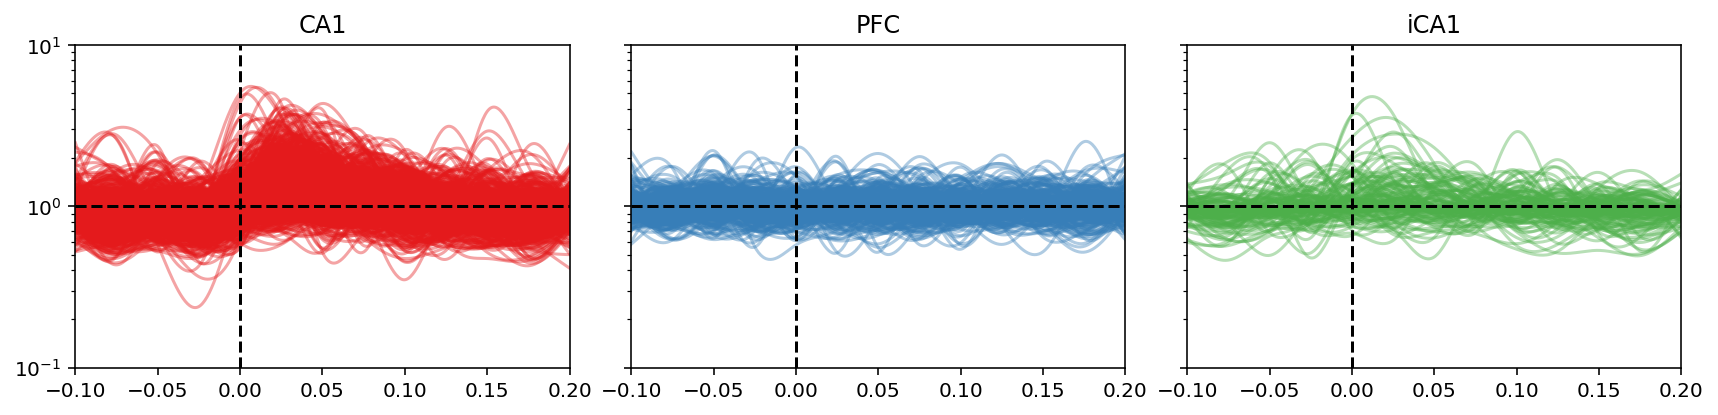

In [21]:
n = neuron_info.loc[neuron_info.neuron_id.isin(over_time.neuron_id.values) &
                    neuron_info.area.isin(['CA1', 'PFC', 'iCA1'])]
areas = n.area.unique()
cmap = plt.get_cmap('Set1')
fig, axes = plt.subplots(1, len(areas), figsize=(12, 3), sharex=True, sharey=True)
for ind, (ax, (brain_area, group)) in enumerate(zip(axes, n.groupby('area'))):
    for neuron_id in group.neuron_id.values:
        data = over_time.sel(neuron_id=neuron_id)
        ax.semilogy(data.time.values, data.multiplicative_gain.values, color=cmap(ind), alpha=0.4)
    ax.set_title(brain_area)
    ax.axvline(0, linestyle='--', color='black')
    ax.axhline(1, linestyle='--', color='black')
    ax.set_xlim((over_time.time.min(), over_time.time.max()))
    ax.set_ylim((0.1, 10))
    
plt.tight_layout();

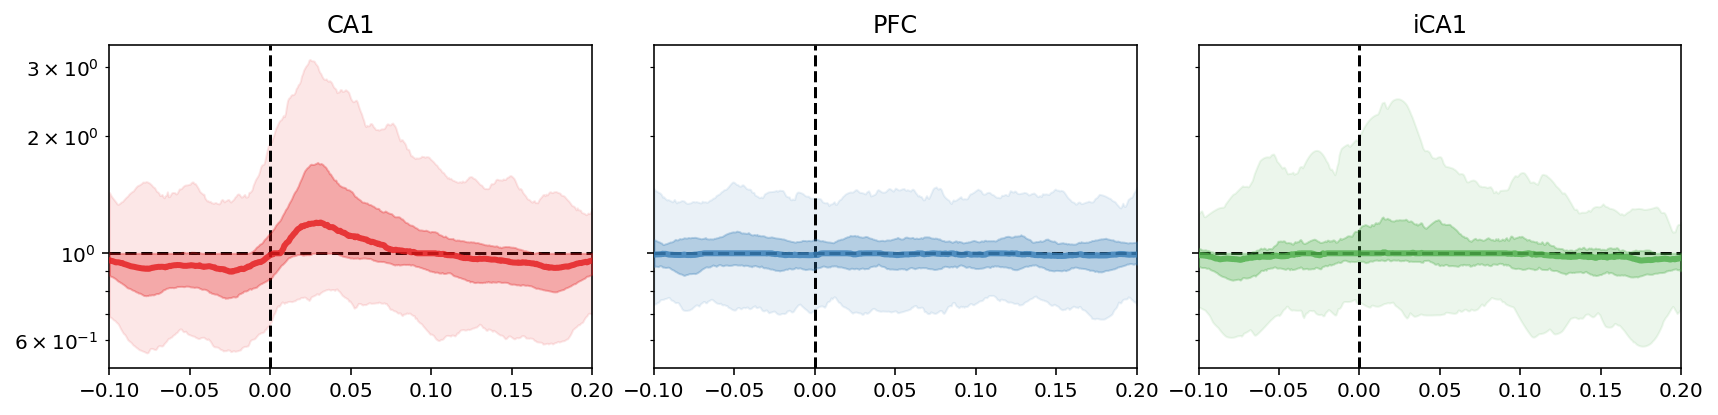

In [23]:
n = neuron_info.loc[neuron_info.neuron_id.isin(over_time.neuron_id.values) &
                    neuron_info.area.isin(['CA1', 'PFC', 'iCA1'])]
areas = n.area.unique()
cmap = plt.get_cmap('Set1')
fig, axes = plt.subplots(1, len(areas), figsize=(12, 3), sharex=True, sharey=True)
for color_ind, (ax, (brain_area, group)) in enumerate(zip(axes, n.groupby('area'))):
    data = (over_time.sel(neuron_id=group.neuron_id.values).multiplicative_gain
            .quantile(q=[0.025, 0.25, 0.5, .75, 0.975], dim='neuron_id'))
    ax.fill_between(
        data.time, data.sel(quantile=0.025).values, data.sel(quantile=0.975).values,
        alpha=0.1, zorder=2, color=cmap(color_ind))
    ax.fill_between(
        data.time, data.sel(quantile=0.25).values, data.sel(quantile=0.75).values,
        alpha=0.3, zorder=3, color=cmap(color_ind))
    ax.semilogy(data.time, data.sel(quantile=0.5).values,
                label=brain_area, linewidth=3, zorder=10, alpha=0.8, color=cmap(color_ind))

    ax.set_title(brain_area)
    ax.axvline(0, linestyle='--', color='black')
    ax.axhline(1, linestyle='--', color='black')
    ax.set_xlim((over_time.time.min(), over_time.time.max()))
    
plt.tight_layout();

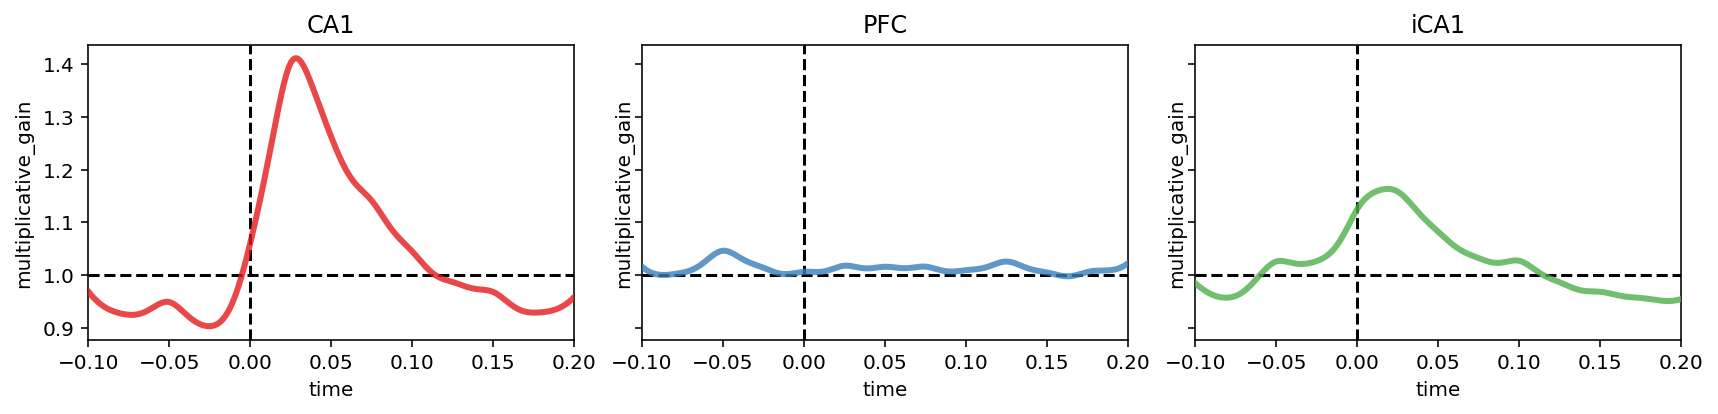

In [26]:
n = neuron_info.loc[neuron_info.neuron_id.isin(over_time.neuron_id.values) &
                    neuron_info.area.isin(['CA1', 'PFC', 'iCA1'])]
areas = n.area.unique()
cmap = plt.get_cmap('Set1')
fig, axes = plt.subplots(1, len(areas), figsize=(12, 3), sharex=True, sharey=True)
for color_ind, (ax, (brain_area, group)) in enumerate(zip(axes, n.groupby('area'))):
    data = (over_time.sel(neuron_id=group.neuron_id.values).multiplicative_gain
            .mean(dim='neuron_id'))
    data.plot(
        label=brain_area, ax=ax, linewidth=3, zorder=10, alpha=0.8, color=cmap(color_ind))
    ax.set_title(brain_area)
    ax.axvline(0, linestyle='--', color='black')
    ax.axhline(1, linestyle='--', color='black')
    ax.set_xlim((over_time.time.min(), over_time.time.max()))
    
plt.tight_layout();

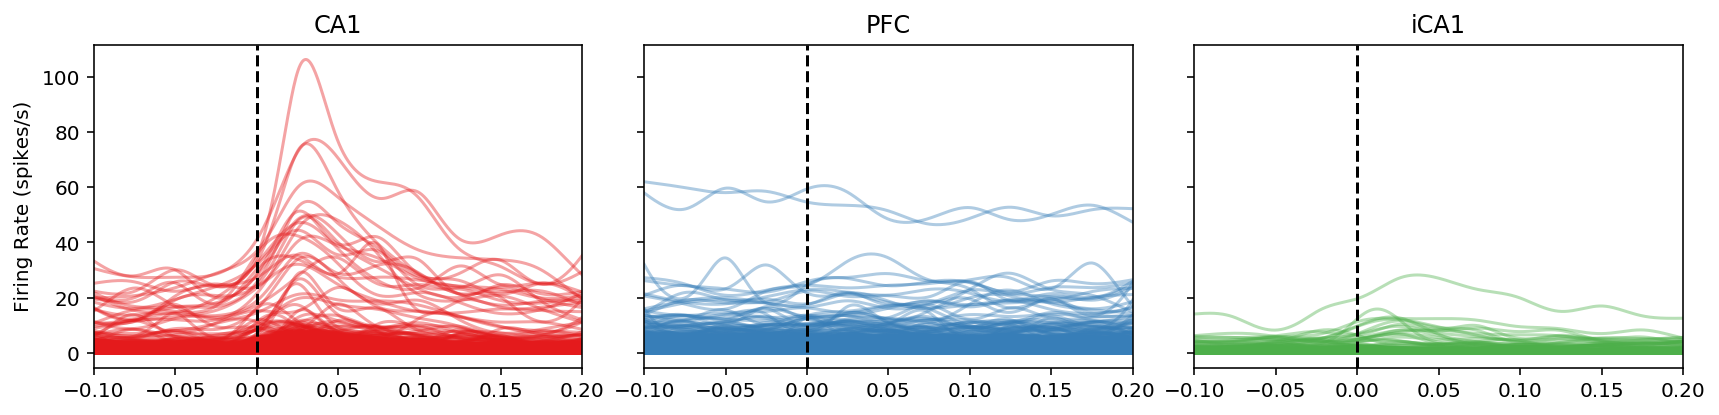

In [35]:
n = neuron_info.loc[neuron_info.neuron_id.isin(over_time.neuron_id.values) &
                    neuron_info.area.isin(['CA1', 'PFC', 'iCA1'])]
areas = n.area.unique()
cmap = plt.get_cmap('Set1')
fig, axes = plt.subplots(1, len(areas), figsize=(12, 3), sharex=True, sharey=True)
for ind, (ax, (brain_area, group)) in enumerate(zip(axes, n.groupby('area'))):
    for neuron_id in group.neuron_id.values:
        data = over_time.sel(neuron_id=neuron_id)
        ax.plot(data.time.values, data.firing_rate.values, color=cmap(ind), alpha=0.4)
    ax.set_title(brain_area)
    ax.axvline(0, linestyle='--', color='black')
    ax.set_xlim((over_time.time.min(), over_time.time.max()))

axes[0].set_ylabel('Firing Rate (spikes/s)')
plt.tight_layout()


## Session Time

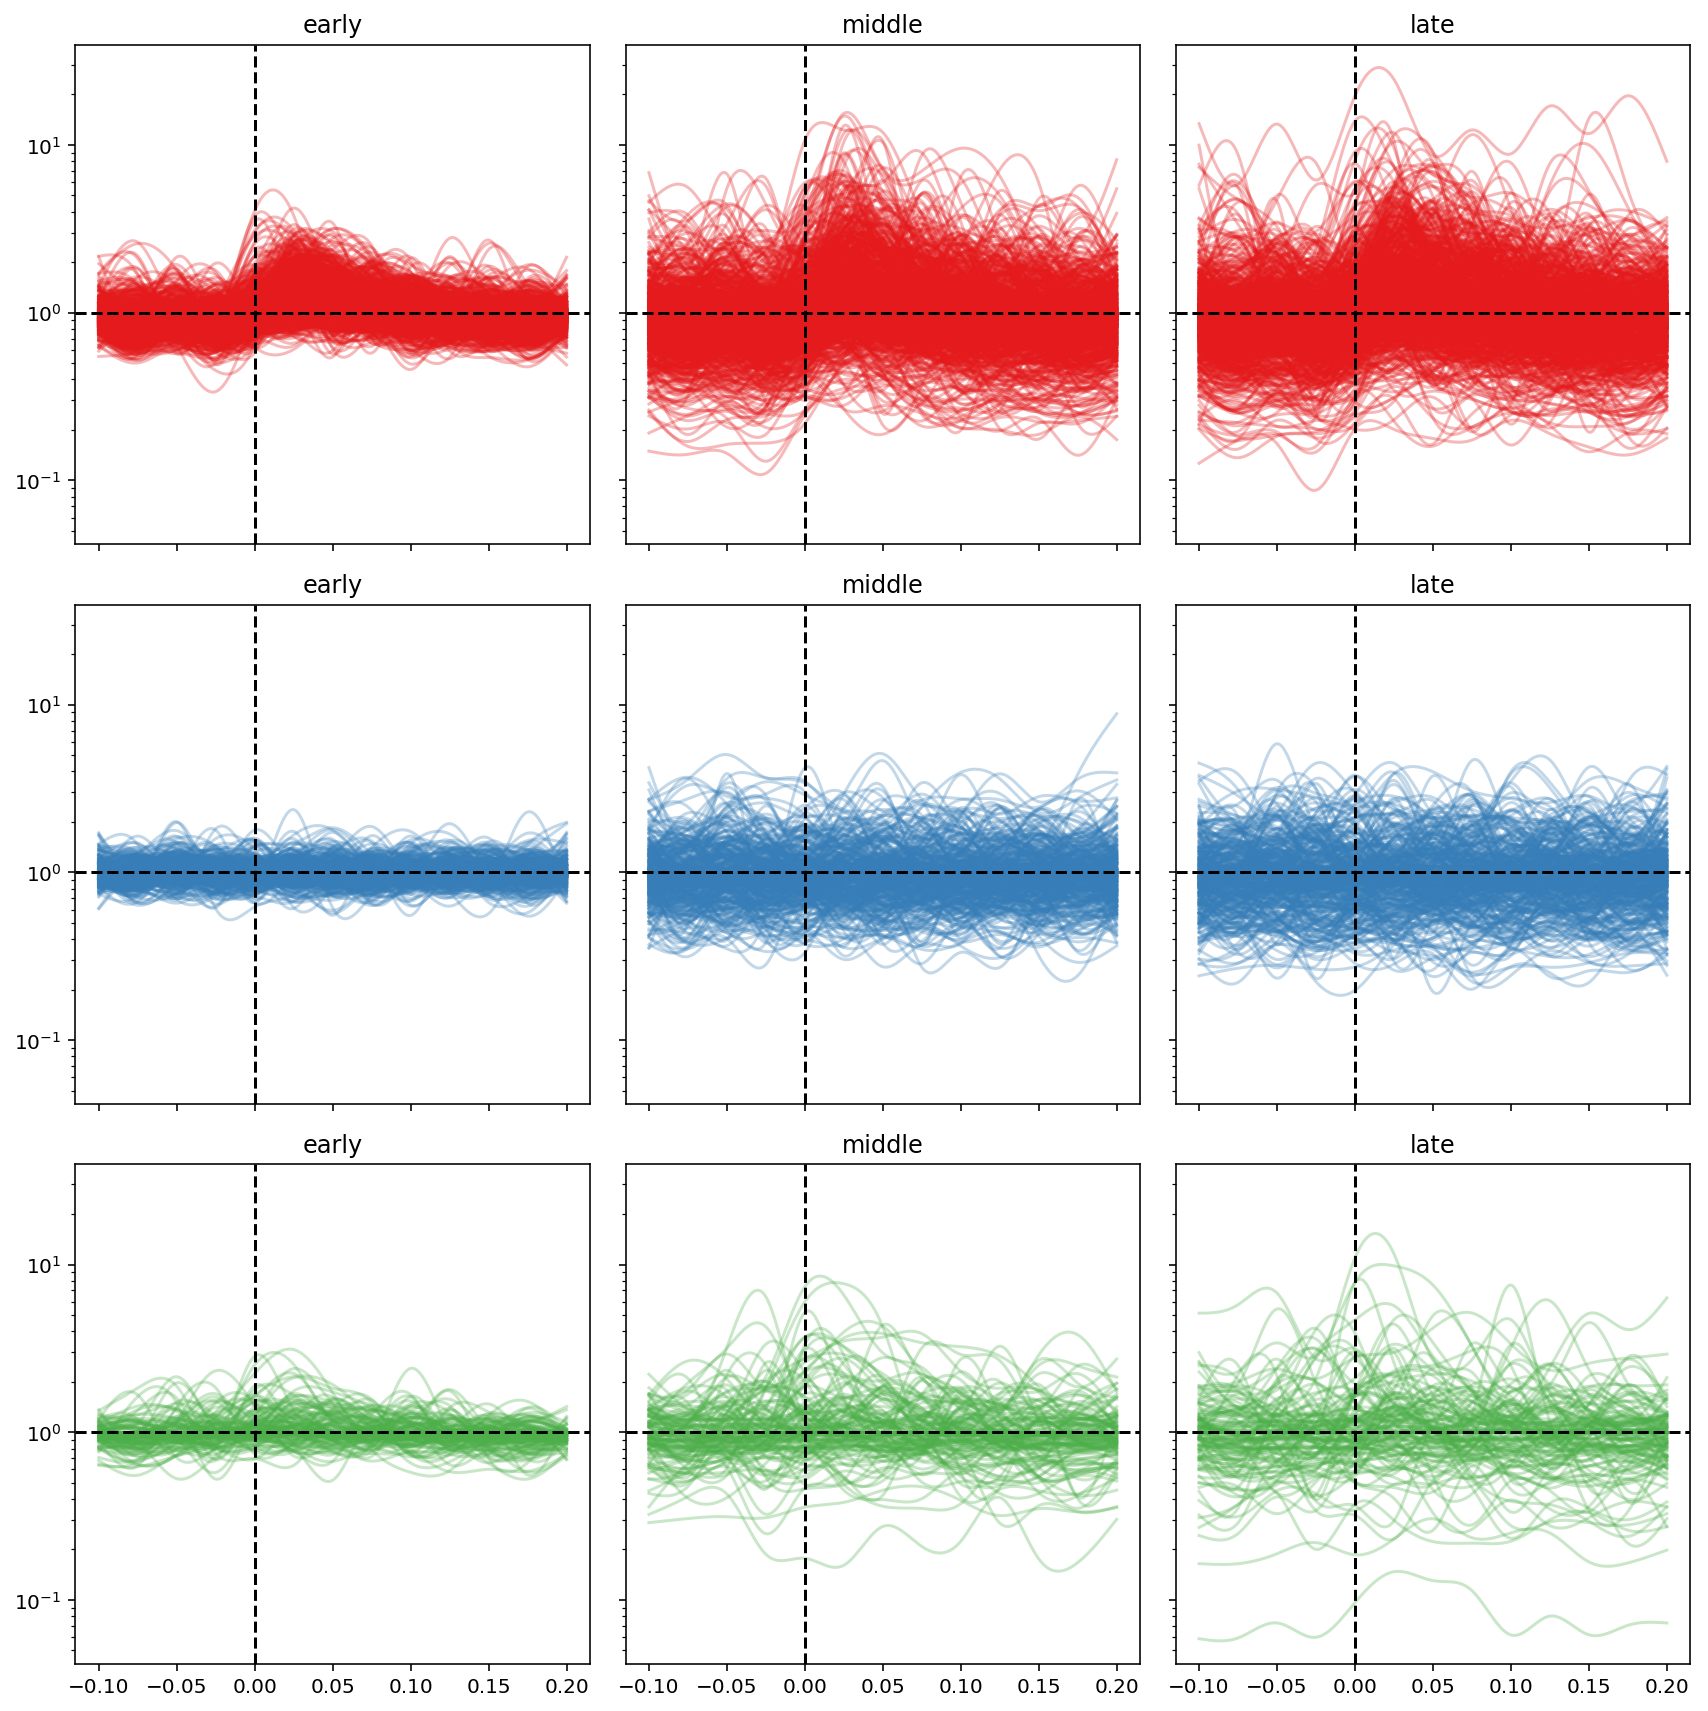

In [27]:
n = neuron_info.loc[neuron_info.neuron_id.isin(over_time.neuron_id.values) &
                    neuron_info.area.isin(['CA1', 'PFC', 'iCA1'])]
cmap = plt.get_cmap('Set1')
fig, axes = plt.subplots(3, 3, figsize=(12, 12), sharey=True, sharex=True)
for color_ind, (a, (brain_area, group)) in enumerate(zip(axes, n.groupby('area'))):
    for ax, st in zip(a, ['early', 'middle', 'late']):
        for neuron_id in group.neuron_id.values:
            data = session_time.sel(neuron_id=neuron_id, session_time=st).multiplicative_gain
            ax.semilogy(data.time, data.values,
                        color=cmap(color_ind), alpha=0.3)
        ax.axvline(0, linestyle='--', color='black')
        ax.axhline(1, linestyle='--', color='black')
        ax.set_title(st)
        
plt.tight_layout()

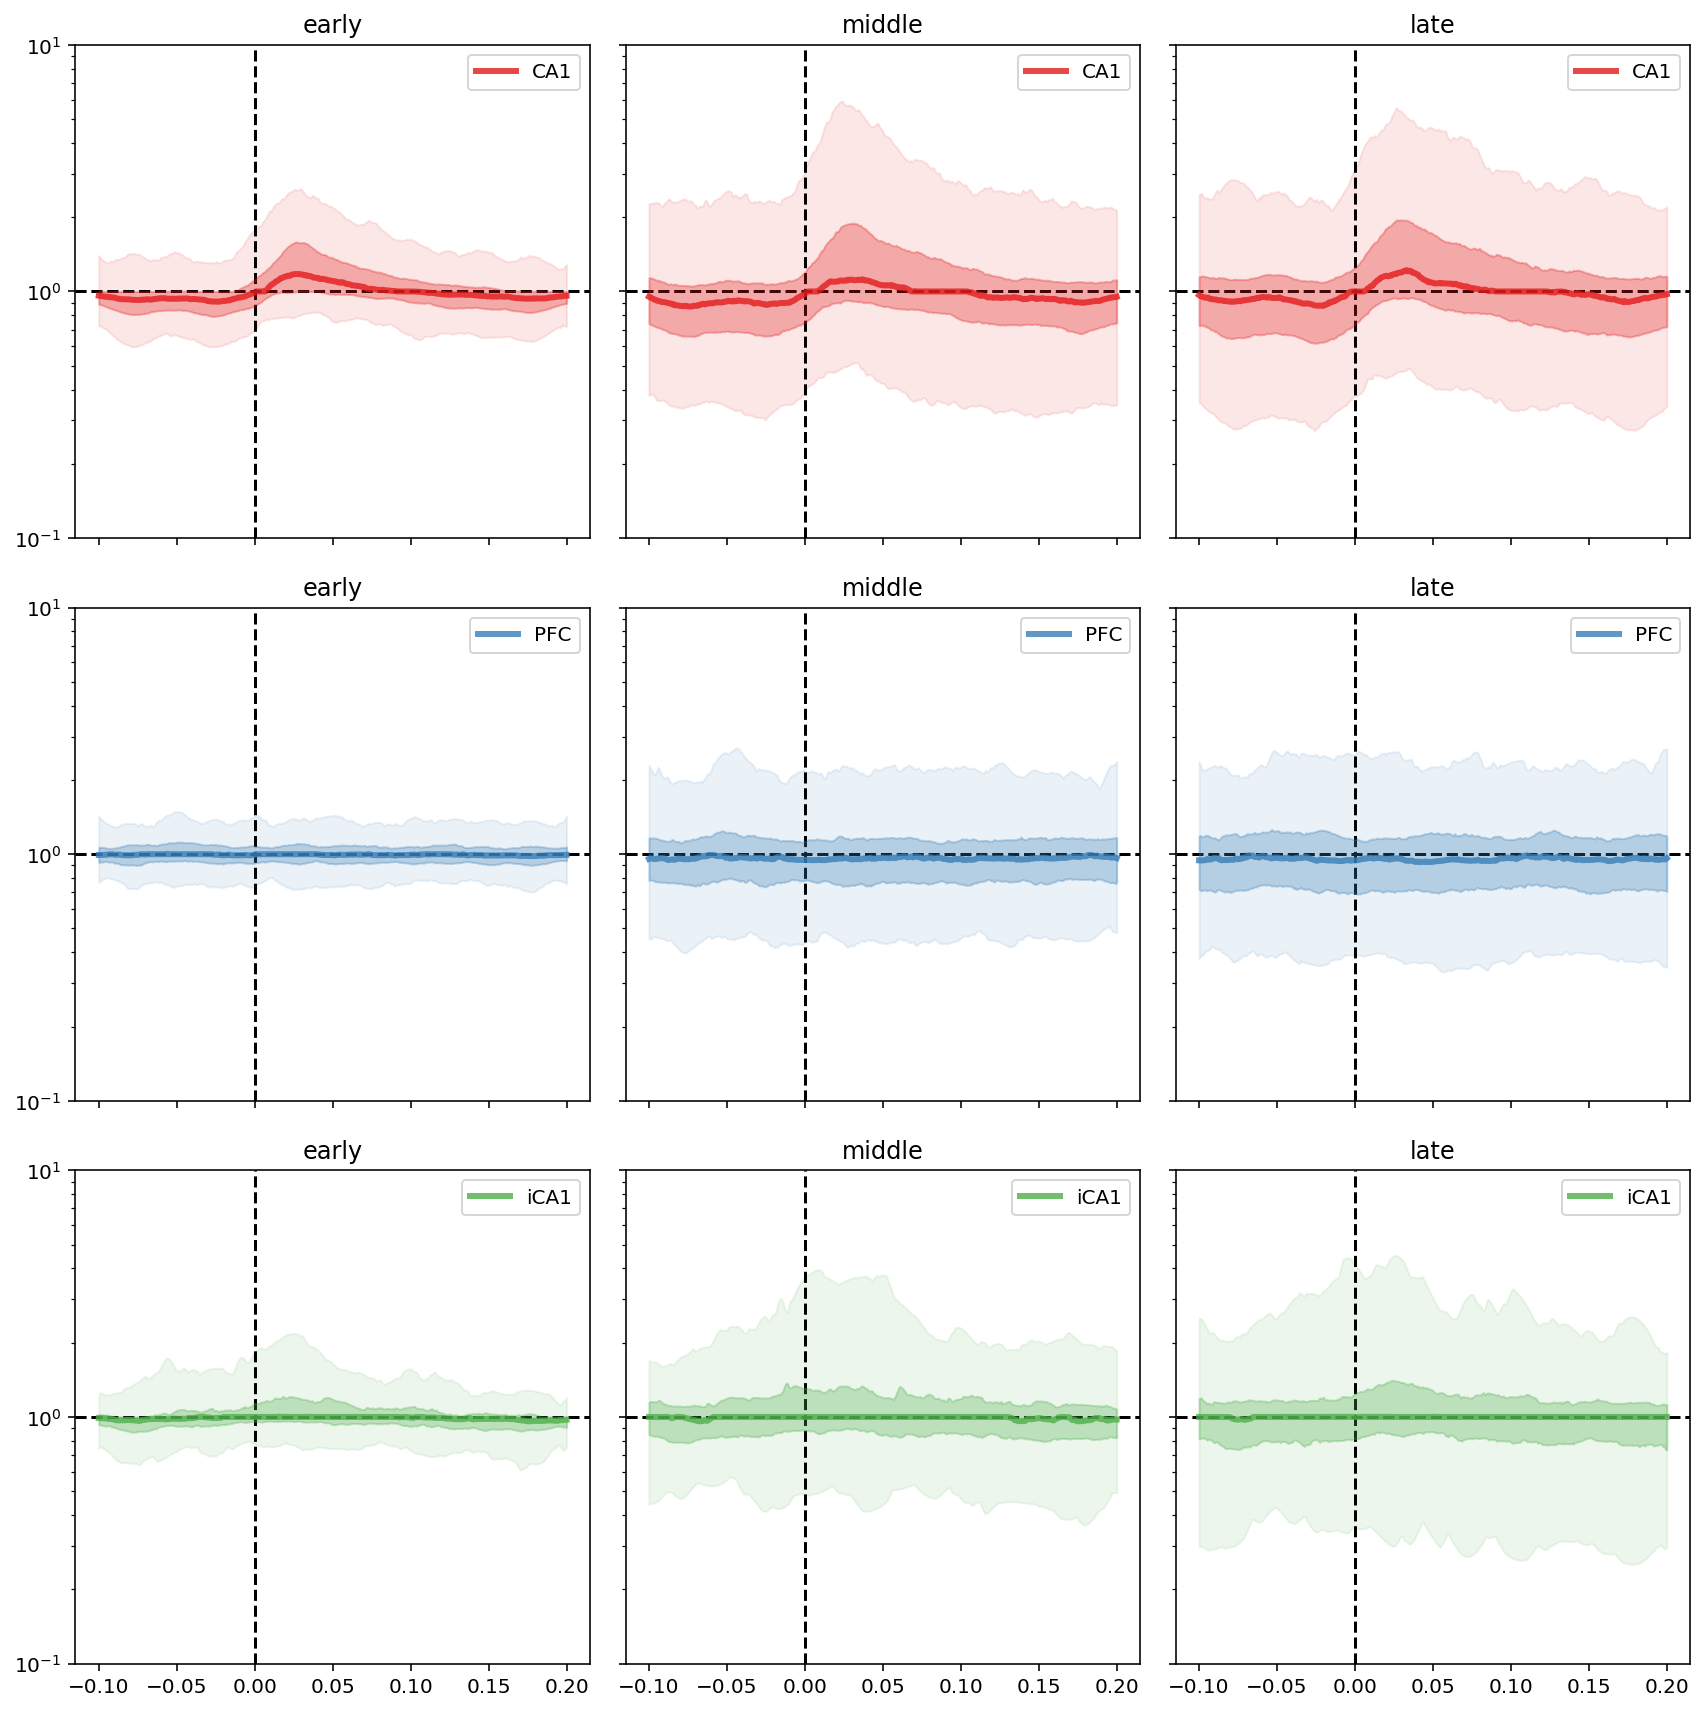

In [30]:
n = neuron_info.loc[neuron_info.neuron_id.isin(over_time.neuron_id.values) &
                    neuron_info.area.isin(['CA1', 'PFC', 'iCA1'])]
cmap = plt.get_cmap('Set1')
fig, axes = plt.subplots(3, 3, figsize=(12, 12), sharey=True, sharex=True)
for color_ind, (a, (brain_area, group)) in enumerate(zip(axes, n.groupby('area'))):
    for ax, st in zip(a, ['early', 'middle', 'late']):
        data = (session_time.sel(neuron_id=group.neuron_id.values, session_time=st)
                .multiplicative_gain.quantile(q=[0.025, 0.25, 0.5, .75, 0.975], dim='neuron_id'))
        ax.fill_between(
            data.time, data.sel(quantile=0.025).values, data.sel(quantile=0.975).values,
            alpha=0.1, zorder=2, color=cmap(color_ind),)
        ax.fill_between(
            data.time, data.sel(quantile=0.25).values, data.sel(quantile=0.75).values,
            alpha=0.3, zorder=3, color=cmap(color_ind),)
        ax.semilogy(data.time, data.sel(quantile=0.5).values,
            label=brain_area, linewidth=3, zorder=10, alpha=0.8, color=cmap(color_ind))
        ax.axvline(0, linestyle='--', color='black')
        ax.axhline(1, linestyle='--', color='black')
        ax.set_title(st)
        ax.legend()
        ax.set_ylim((0.1, 10))
        
plt.tight_layout()

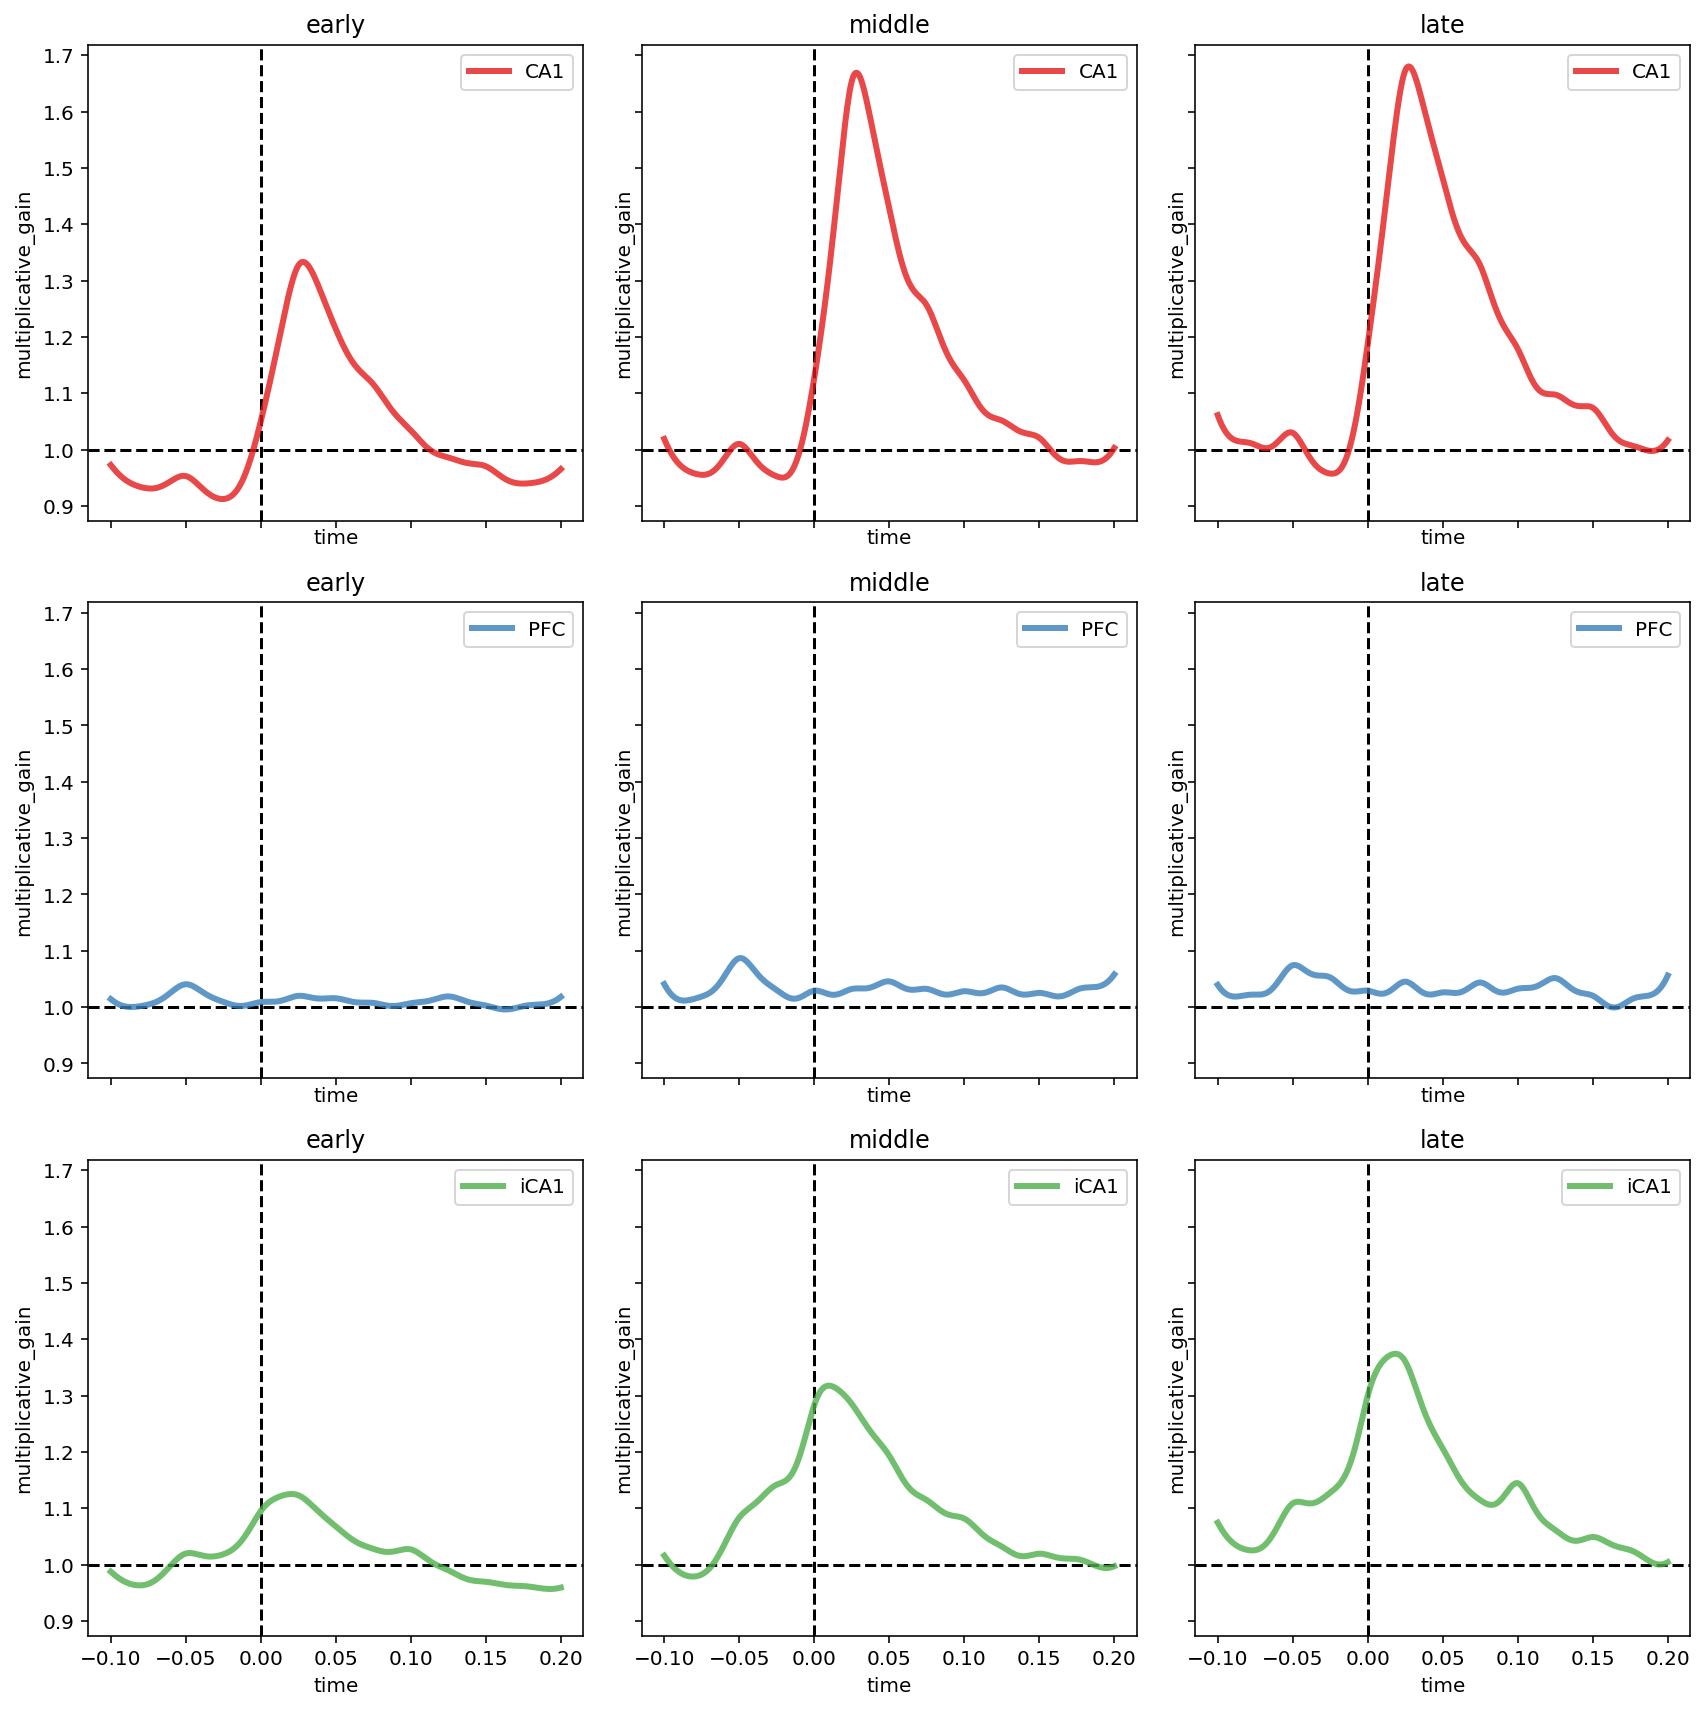

In [16]:
n = neuron_info.loc[neuron_info.neuron_id.isin(over_time.neuron_id.values) &
                    neuron_info.area.isin(['CA1', 'PFC', 'iCA1'])]
cmap = plt.get_cmap('Set1')
fig, axes = plt.subplots(3, 3, figsize=(12, 12), sharey=True, sharex=True)
for color_ind, (a, (brain_area, group)) in enumerate(zip(axes, n.groupby('area'))):
    for ax, st in zip(a, ['early', 'middle', 'late']):
        data = (session_time.sel(neuron_id=group.neuron_id.values)
                .sel(session_time=st).multiplicative_gain.mean(dim='neuron_id'))
        data.plot(
            label=brain_area, ax=ax, linewidth=3, zorder=10, alpha=0.8, color=cmap(color_ind))
        ax.axvline(0, linestyle='--', color='black')
        ax.axhline(1, linestyle='--', color='black')
        ax.set_title(st)
        ax.legend();
        
plt.tight_layout()

## Ripple by replay state

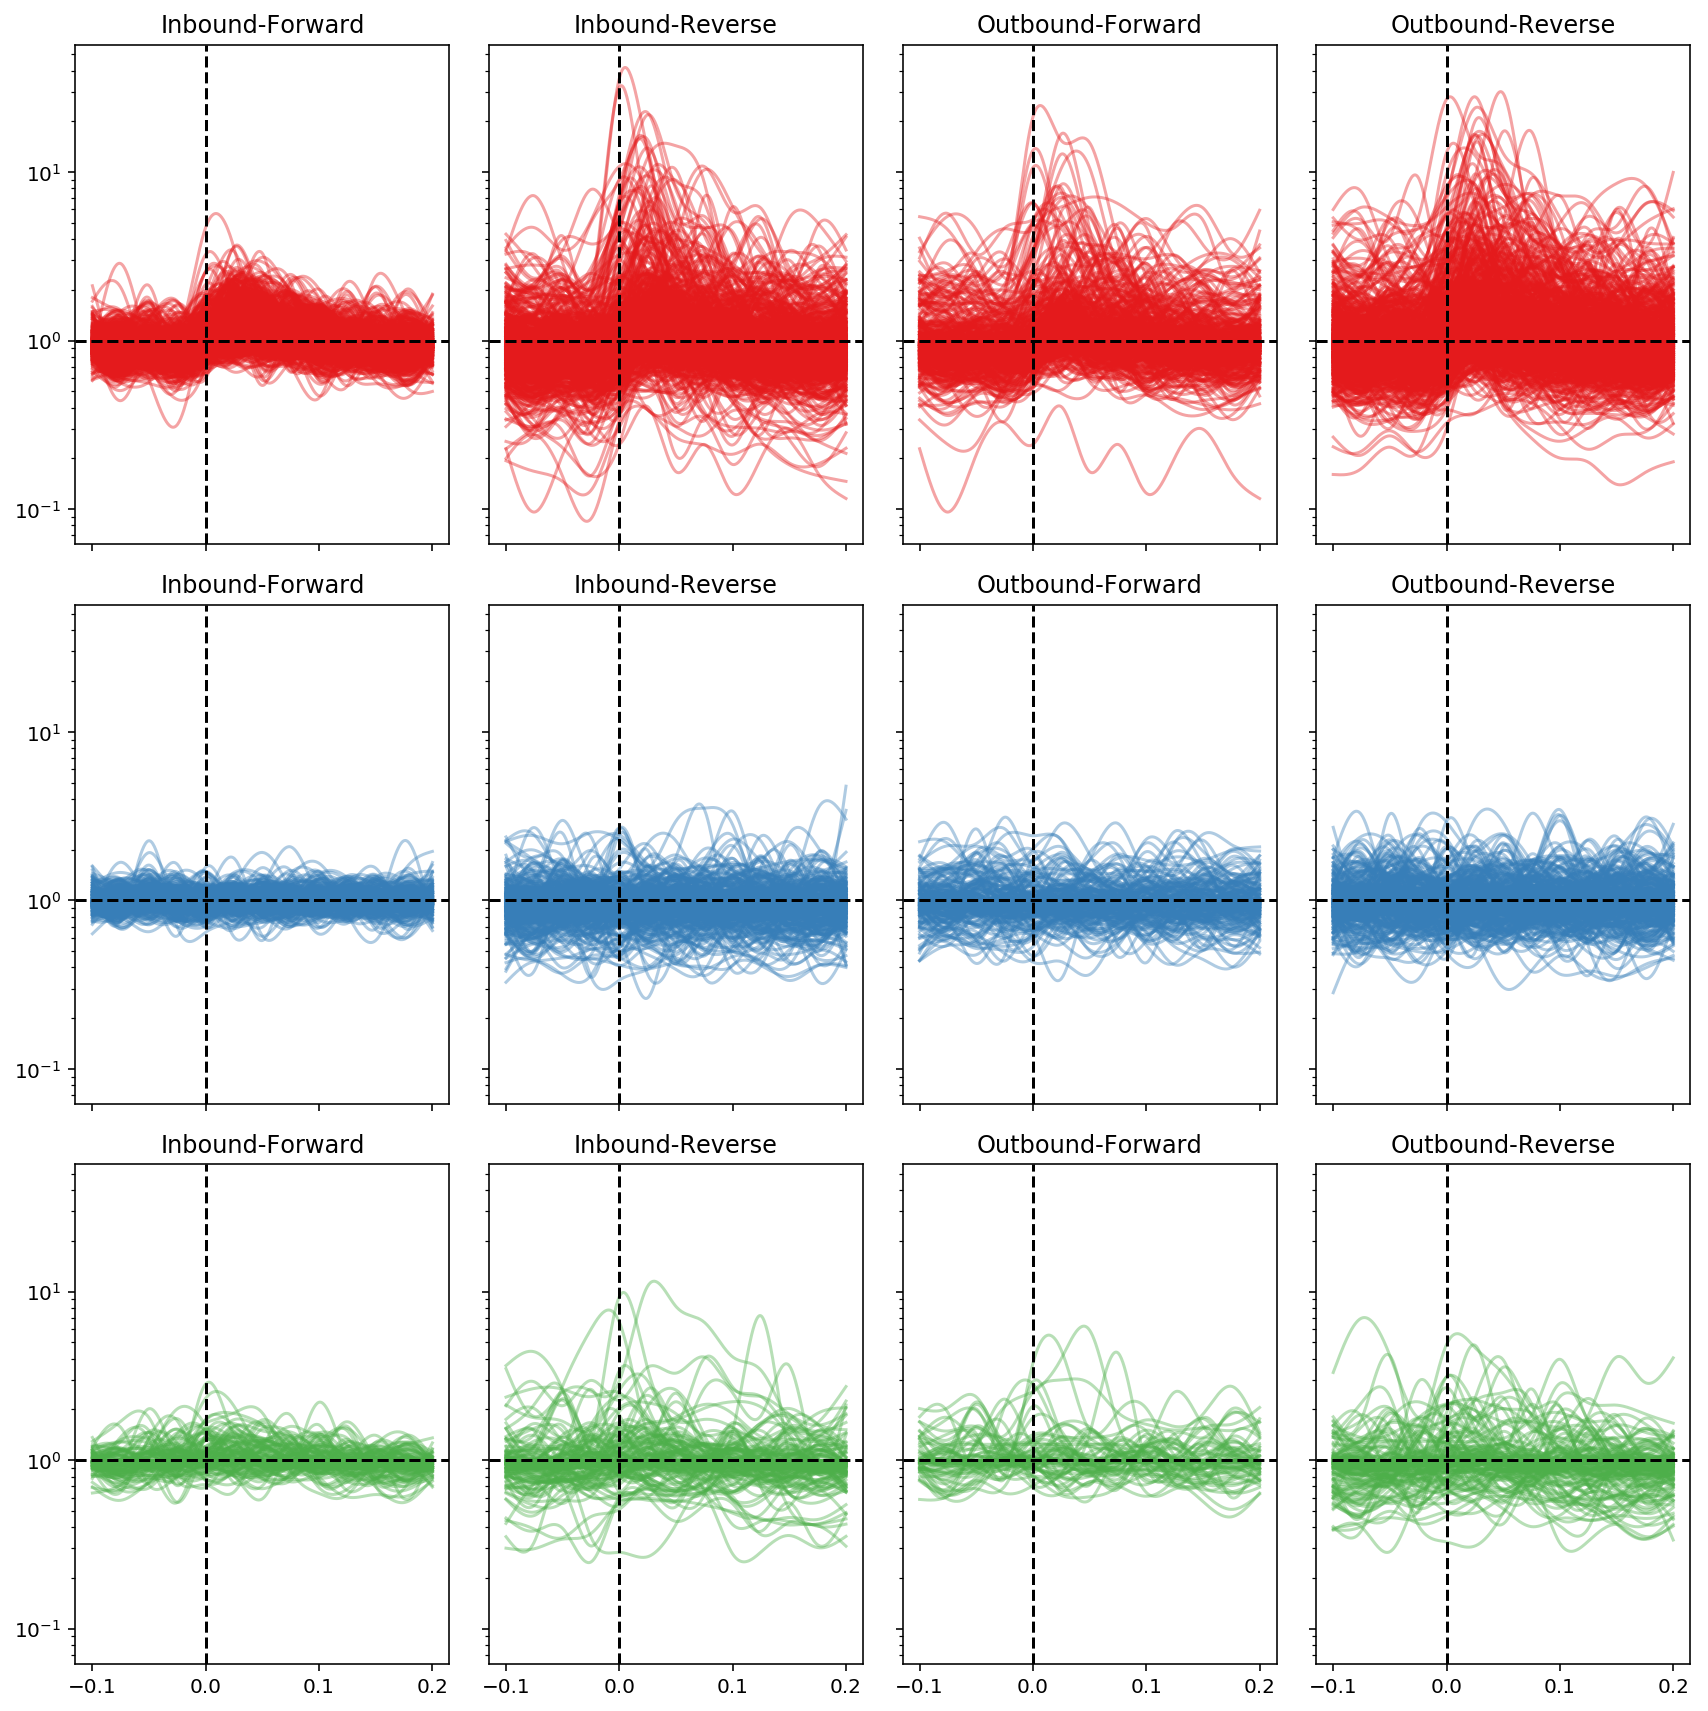

In [37]:
n = neuron_info.loc[neuron_info.neuron_id.isin(over_time.neuron_id.values) &
                    neuron_info.area.isin(['CA1', 'PFC', 'iCA1'])]
cmap = plt.get_cmap('Set1')
fig, axes = plt.subplots(3, 4, figsize=(12, 12), sharey=True, sharex=True)
for color_ind, (a, (brain_area, group)) in enumerate(zip(axes, n.groupby('area'))):
    for ax, st in zip(a, ['Inbound-Forward', 'Inbound-Reverse', 'Outbound-Forward', 'Outbound-Reverse']):
        for neuron_id in group.neuron_id.values:
            data = replay_state.sel(neuron_id=neuron_id, predicted_state=st).multiplicative_gain
            ax.semilogy(data.time, data.values,
                    color=cmap(color_ind), alpha=0.4)
        ax.axvline(0, linestyle='--', color='black')
        ax.axhline(1, linestyle='--', color='black')
        ax.set_title(st)
        
plt.tight_layout()

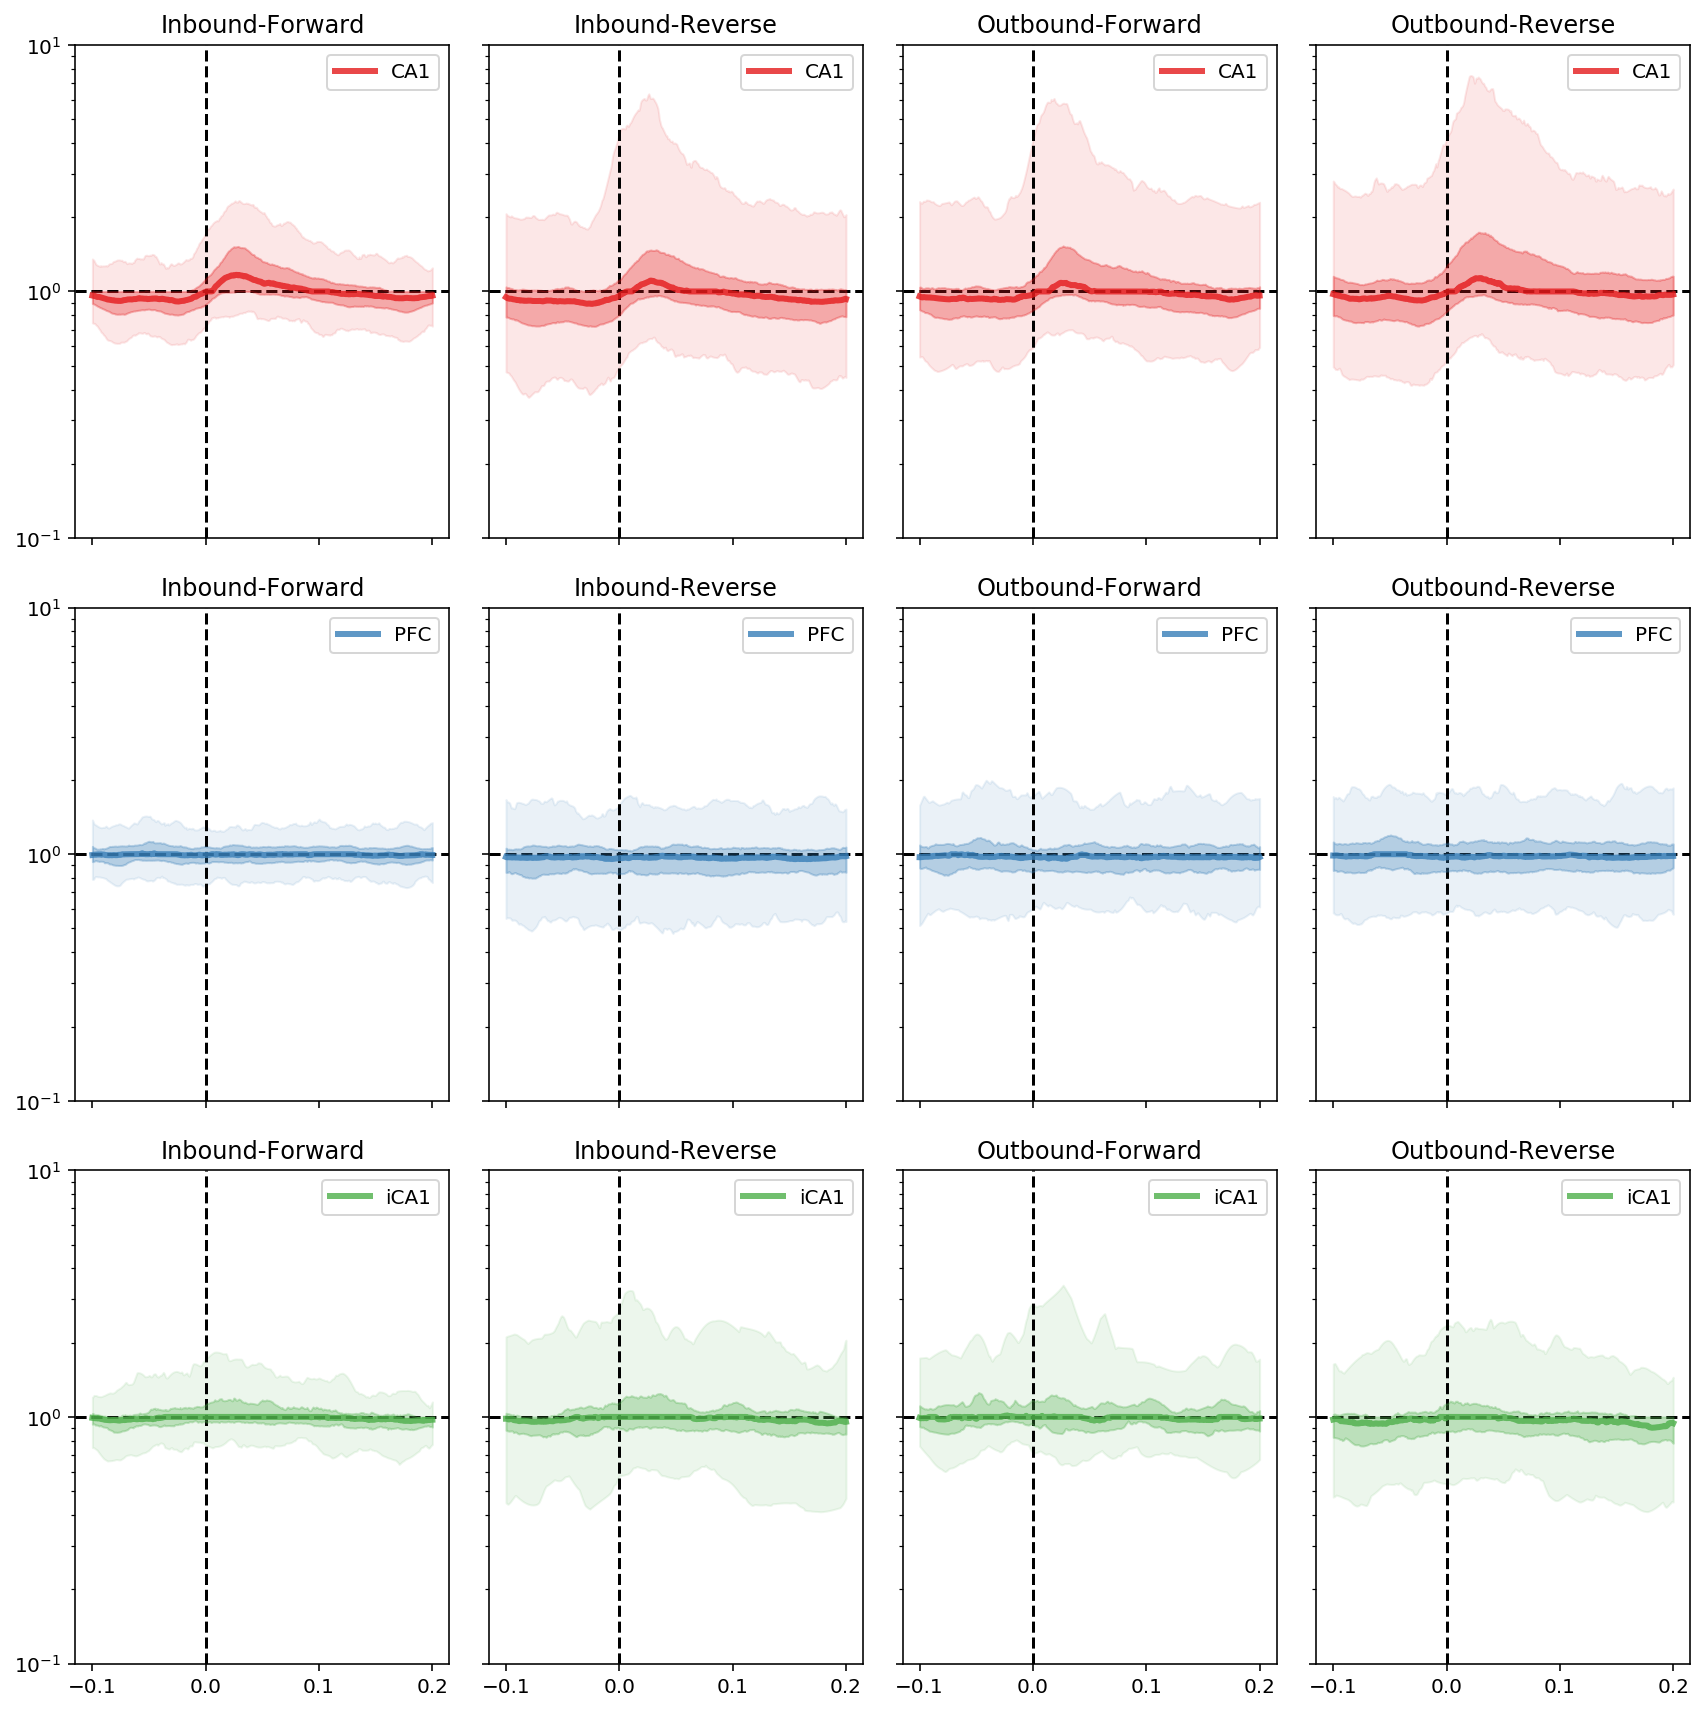

In [40]:
n = neuron_info.loc[neuron_info.neuron_id.isin(over_time.neuron_id.values) &
                    neuron_info.area.isin(['CA1', 'PFC', 'iCA1'])]
cmap = plt.get_cmap('Set1')
fig, axes = plt.subplots(3, 4, figsize=(12, 12), sharey=True, sharex=True)
for color_ind, (a, (brain_area, group)) in enumerate(zip(axes, n.groupby('area'))):
    for ax, st in zip(a, ['Inbound-Forward', 'Inbound-Reverse', 'Outbound-Forward', 'Outbound-Reverse']):
        data = (replay_state.sel(neuron_id=group.neuron_id.values, predicted_state=st)
                .multiplicative_gain.quantile(q=[0.025, 0.25, 0.5, .75, 0.975], dim='neuron_id'))
        ax.fill_between(
            data.time, data.sel(quantile=0.025).values, data.sel(quantile=0.975).values,
            alpha=0.1, zorder=2, color=cmap(color_ind),)
        ax.fill_between(
            data.time, data.sel(quantile=0.25).values, data.sel(quantile=0.75).values,
            alpha=0.3, zorder=3, color=cmap(color_ind),)
        ax.semilogy(data.time, data.sel(quantile=0.5).values,
                label=brain_area, linewidth=3, zorder=10, alpha=0.8, color=cmap(color_ind))
        ax.axvline(0, linestyle='--', color='black')
        ax.axhline(1, linestyle='--', color='black')
        ax.set_title(st)
        ax.legend();
        ax.set_ylim((0.1, 10))
        
plt.tight_layout()

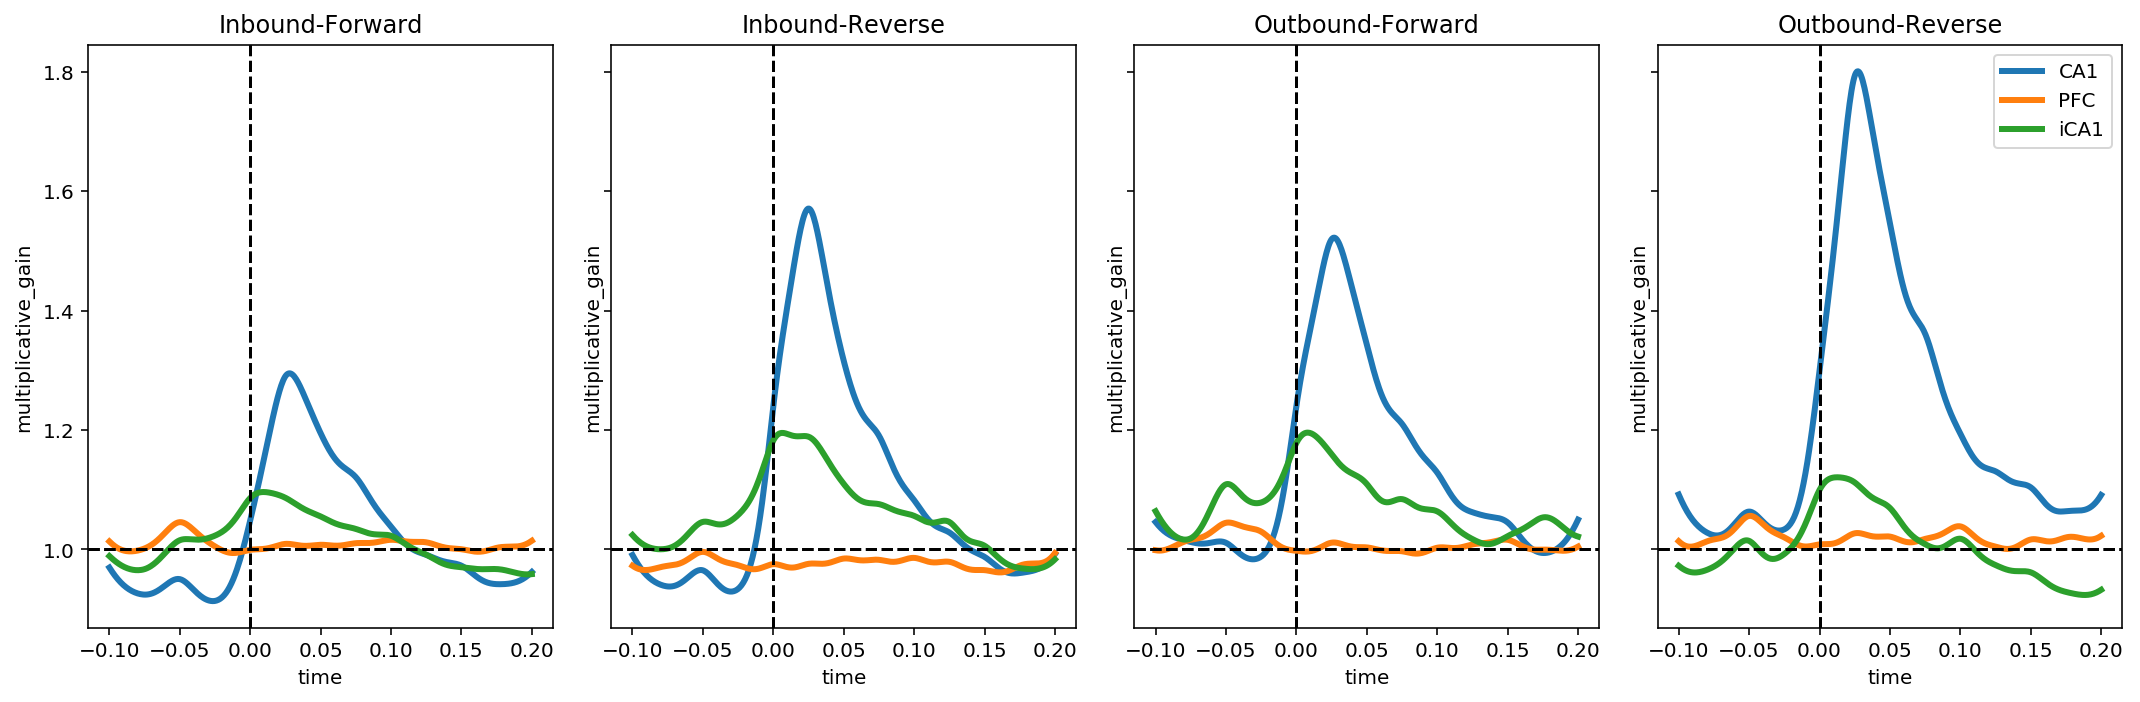

In [13]:
n = neuron_info.loc[neuron_info.neuron_id.isin(over_time.neuron_id.values) &
                    neuron_info.area.isin(['CA1', 'PFC', 'iCA1'])]
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharex=True, sharey=True)
for brain_area, group in n.groupby('area'):
    for ax, st in zip(axes, ['Inbound-Forward', 'Inbound-Reverse', 'Outbound-Forward', 'Outbound-Reverse']):
        (replay_state.sel(neuron_id=group.neuron_id.values)
         .sel(predicted_state=st).multiplicative_gain.mean('neuron_id').plot(
             label=brain_area, ax=ax, linewidth=3))
        ax.axvline(0, linestyle='--', color='black')
        ax.axhline(1, linestyle='--', color='black')
        ax.set_title(st)
        plt.tight_layout()
        plt.legend();

# KS

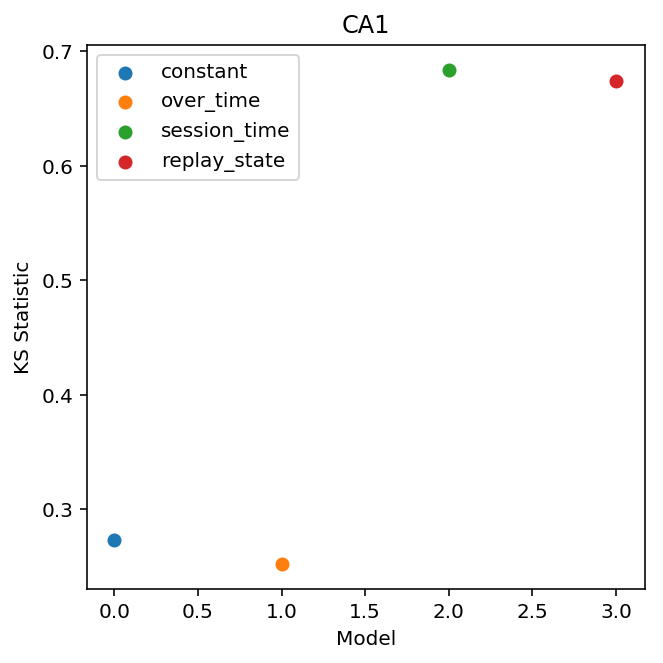

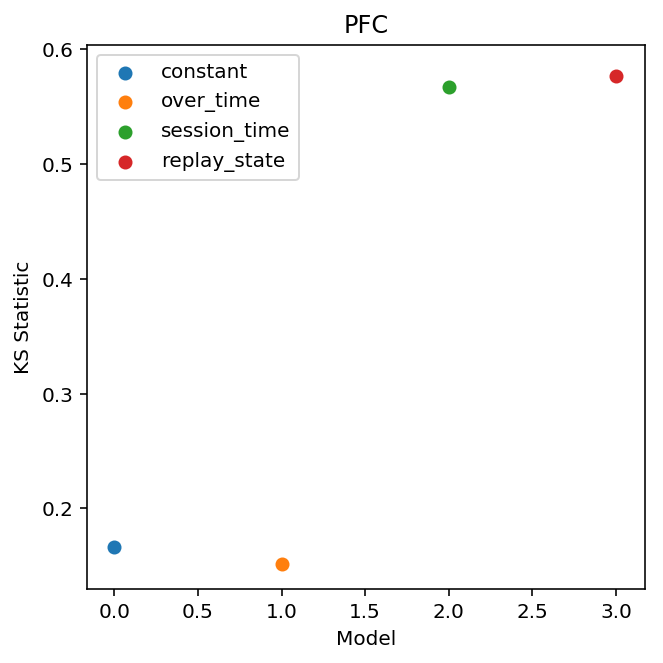

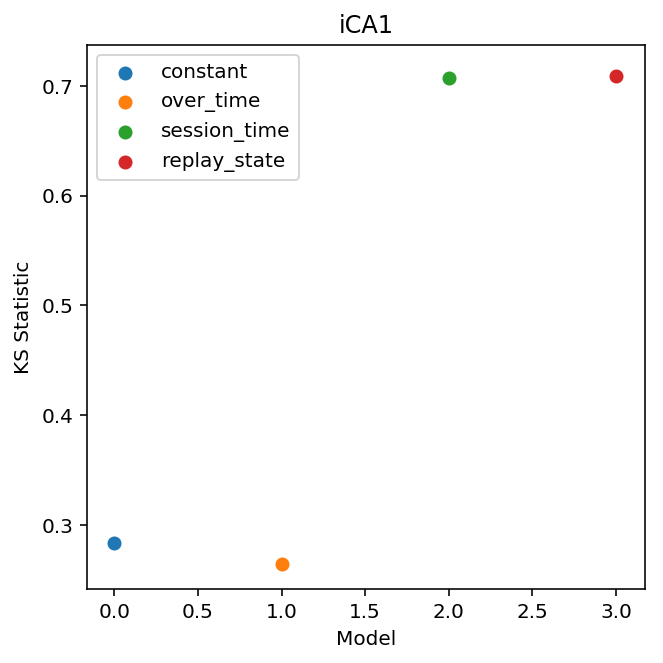

In [19]:
n = neuron_info.loc[neuron_info.neuron_id.isin(over_time.neuron_id.values) &
                    neuron_info.area.isin(['CA1', 'PFC', 'iCA1'])]
labels = ['constant', 'over_time', 'session_time', 'replay_state']
for id, group in n.groupby('area'):
    fig, axes = plt.subplots(1, 1, figsize=(5, 5))
    for i, m in enumerate([constant, over_time, session_time, replay_state]):
        ks = m.sel(neuron_id=group.neuron_id.values).ks_statistic.mean()
        plt.scatter(i, ks, label=labels[i])
        plt.legend()
        plt.title(id)
        plt.ylabel('KS Statistic')
        plt.xlabel('Model')

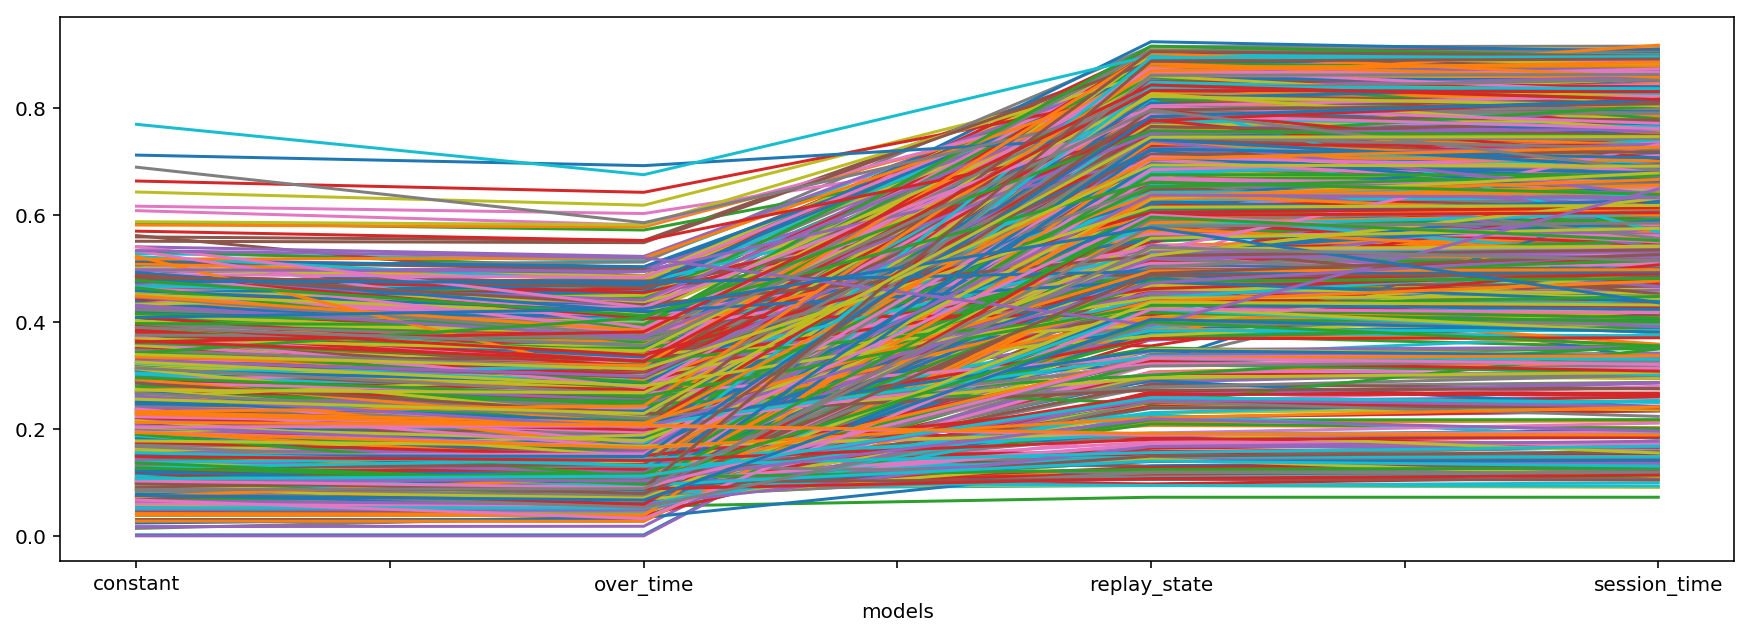

In [66]:
ks_statistic = xr.concat(
    (constant.ks_statistic, over_time.ks_statistic,
     session_time.ks_statistic, replay_state.ks_statistic), dim='models'
)
ks_statistic['models'] = ['constant', 'over_time', 'session_time', 'replay_state']
ks_statistic = ks_statistic.to_dataframe().unstack(level=0)
ks_statistic.columns = ks_statistic.columns.droplevel(level=0)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ks_statistic.T.plot(legend=False, ax=ax);

In [62]:
ks_statistic.head()

models             constant  over_time  replay_state  session_time
neuron_id                                                         
HPa_01_04_001_001  0.244042   0.298996      0.629928      0.610351
HPa_01_04_001_002  0.367172   0.366851      0.368170      0.485016
HPa_01_04_001_003  0.163468   0.162799      0.753460      0.750360
HPa_01_04_001_004  0.149942   0.128227      0.901387      0.894210
HPa_01_04_001_005  0.134957   0.145411      0.345009      0.336562

In [67]:
ks_statistic = pd.concat((ks_statistic, neuron_info.set_index('neuron_id').area), axis=1).dropna()

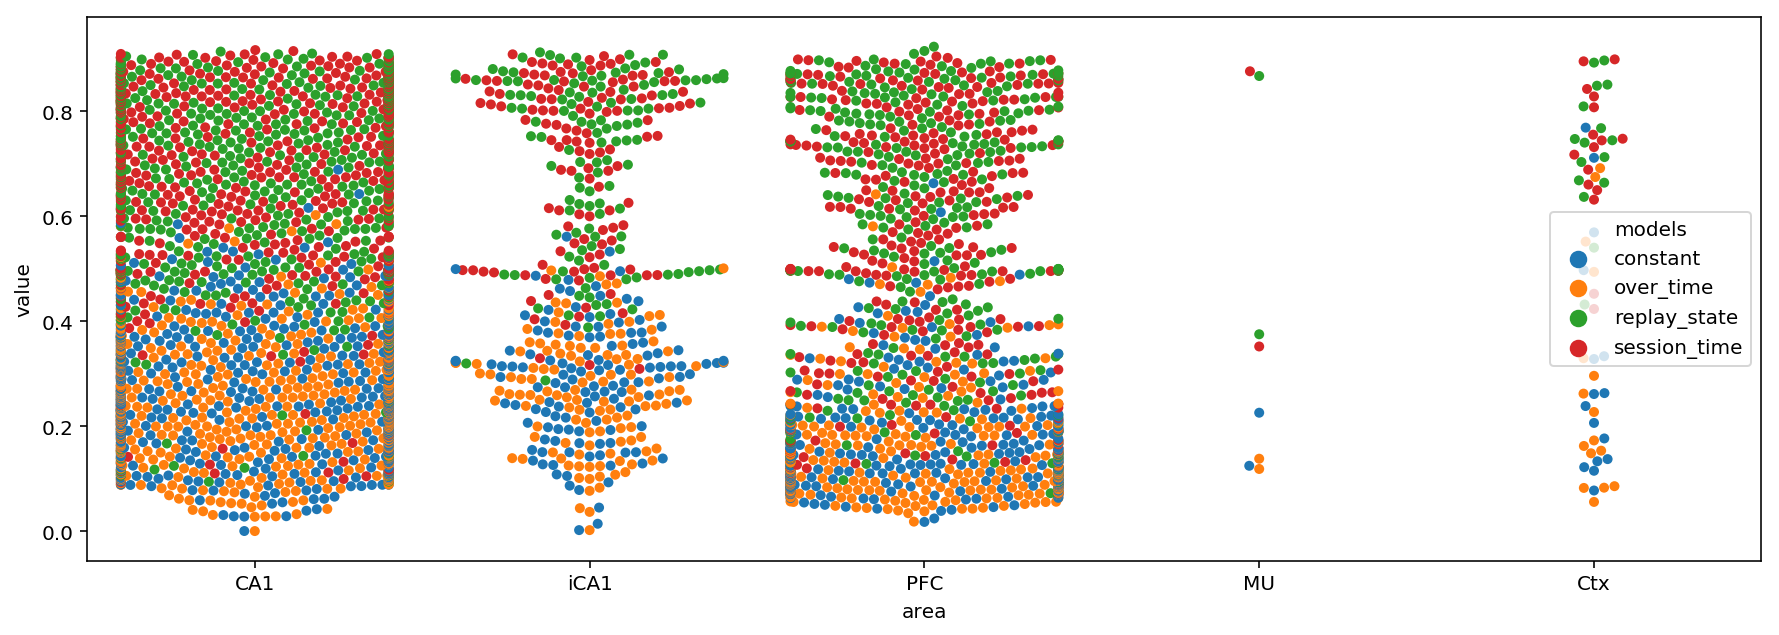

In [70]:
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.swarmplot(x='area', y='value', hue='models',
              data=pd.melt(ks_statistic, 'area', var_name='models'), ax=ax)